# Project Objectives & Business Insights

Here are the 20 possible questions which might help business men and future travelers:
1. What is the trend of Indonesian traveller visits to Singapore over time (by year and recorded month)?
2. Which city of residence in Indonesia has the highest number of travellers visiting Singapore?
3. What is the relationship between the purpose of travel and the length of stay for Indonesian travellers?
4. What is the relationship between the type of travel and the amount spent by Indonesian travellers on transport?
5. What class of indonesians mostly visit Singapore?
6. Which age group of Indonesian travellers spends the most on food and beverages?
7. What is the relationship between the occupation of Indonesian travellers and the amount spent on business activities?
8. How many visitors visited Singapore have their 1st visit based upon their designation? 
9. What is the relationship between the type of accommodation preferred by Indonesian travellers and the amount spent on accommodation?
10. What is the relationship between the companion of Indonesian travellers and the amount spent on shopping?

# Data Preprocessing & Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('mock indonesian traveller survey data.csv')

In [3]:
df.head()

,case,Year,R.mth,date,Country_residence,City_residence,Purpose_grp,Purpose,Air_Terminal,Sea_Terminal,...,totmedi_$,tototh_$,totshopping_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,1-Jan-15,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,Terminal 1,NaN,...,0,0.0,854.85,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,...,0,0.0,171.52,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,...,0,0.0,104.85,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Others,NaN,HCC,...,0,0.0,220.85,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,1-Jan-15,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",NaN,HCC,...,0,0.0,104.85,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


In [4]:
df.shape

(8887, 35)

In [5]:
df1 = df.drop('case', axis = 1)

Case Column is dropped as it was not going to help in exploratory data anaylsis it was just telling us the case numbers of interviewee for collection purpose of data

In [6]:
df1.head(5)

,Year,R.mth,date,Country_residence,City_residence,Purpose_grp,Purpose,Air_Terminal,Sea_Terminal,Land_Terminal,...,totmedi_$,tototh_$,totshopping_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,2015,January,1-Jan-15,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,Terminal 1,NaN,NaN,...,0,0.0,854.85,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,NaN,...,0,0.0,171.52,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,NaN,...,0,0.0,104.85,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,2015,January,1-Jan-15,Indonesia,Batam,Leisure,Others,NaN,HCC,NaN,...,0,0.0,220.85,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,2015,January,1-Jan-15,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",NaN,HCC,NaN,...,0,0.0,104.85,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


In [7]:
#checking null values in dataset
df1.isnull().sum()

Year                     0
R.mth                    0
date                     0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Air_Terminal          3190
Sea_Terminal          6059
Land_Terminal         8532
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry           2844
f5_designation        3096
f5_designation.oth    2969
totacc_$                 0
totfnb_$                 0
tottran_$                0
totbiz_$                 0
totedu_$                 0
totmedi_$                0
tototh_$                 0
totshopping_$            0
MainAccomm              33
MainHotel             4590
travel_companion.1       0
travel_companion.2    7255
travel_companion.3    8397
travel_companion.4    8793
travel_companion.5    8870
dtype: int64

Now if we will look into this output there are several columns which have almost every row with Nan values like if you see all travel companion columns except one and Land_terminal column, the dataset has total of 8887 rows and if you compare null values in these columns you will get the idea that these columns are worthy dropping from the dataset

In [8]:
df2 = df1.drop(['Land_Terminal', 'travel_companion.2','travel_companion.3','travel_companion.4','travel_companion.5'], axis = 1)

In [9]:
df2.shape

(8887, 29)

In [10]:
df2.isnull().sum()

Year                     0
R.mth                    0
date                     0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Air_Terminal          3190
Sea_Terminal          6059
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry           2844
f5_designation        3096
f5_designation.oth    2969
totacc_$                 0
totfnb_$                 0
tottran_$                0
totbiz_$                 0
totedu_$                 0
totmedi_$                0
tototh_$                 0
totshopping_$            0
MainAccomm              33
MainHotel             4590
travel_companion.1       0
dtype: int64

In [11]:
df2['MainAccomm'].fillna(value=df['MainAccomm'].mode()[0], inplace = True)

In [12]:
df2.isnull().sum()

Year                     0
R.mth                    0
date                     0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Air_Terminal          3190
Sea_Terminal          6059
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry           2844
f5_designation        3096
f5_designation.oth    2969
totacc_$                 0
totfnb_$                 0
tottran_$                0
totbiz_$                 0
totedu_$                 0
totmedi_$                0
tototh_$                 0
totshopping_$            0
MainAccomm               0
MainHotel             4590
travel_companion.1       0
dtype: int64

MainAccom column has very less null values so we fill them with mode of the entire column. Right now we didn't fill other columns with mode values because they might overfit the data and make our data biased as of now

In [13]:
df2['1st_visit'].unique()

array(['No', 'Yes'], dtype=object)

This column has only two types of values yes or no as we are more comfortable working with numbers than objects and strings so we will perform label encoding and convert yes into 1 and no into 0.

In [14]:
#Using Label Encoder we will encode the label column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df2['1st_visit'] = encoder.fit_transform(df2['1st_visit'])

In [15]:
df2['1st_visit'].unique()

array([0, 1])

# Exploratory Visualization

Now we will answer every question one by one using visualization technique and statistical analysis and will explain the advantage of visualization for research an business 

 ### Q1: What is the trend of Indonesian traveller visits to Singapore over time (by year and recorded month)?

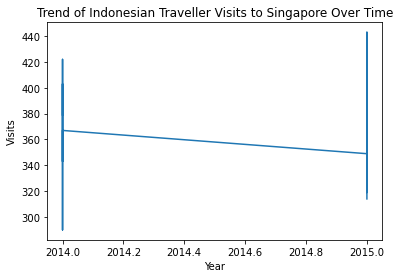

In [16]:
grouped_data = df2.groupby(["Year", "R.mth"]).size().reset_index(name="Visits")

plt.plot(grouped_data["Year"], grouped_data["Visits"])
plt.xlabel("Year")
plt.ylabel("Visits")
plt.title("Trend of Indonesian Traveller Visits to Singapore Over Time")
plt.show()

This visualization can help business men and future travellers by providing a clear picture of the trend in Indonesian traveller visits to Singapore over time. Business men can use this information to make informed decisions about their investments, such as planning new tourist attractions or opening new hotels in areas that are popular with Indonesian travellers. Future travellers can also use this information to plan their trips, by choosing to travel during months when there are fewer Indonesian travellers in Singapore. By understanding the trend in Indonesian traveller visits to Singapore, both business men and future travellers can make more informed decisions.

If you look into the graph you will get to know that most of the visits were made in 2015 and then in 2014 and in future these visits are going to increase day by day so business men should plan investing in singapore.

 ### Q2: Which city of residence in Indonesia has the highest number of travellers visiting Singapore?

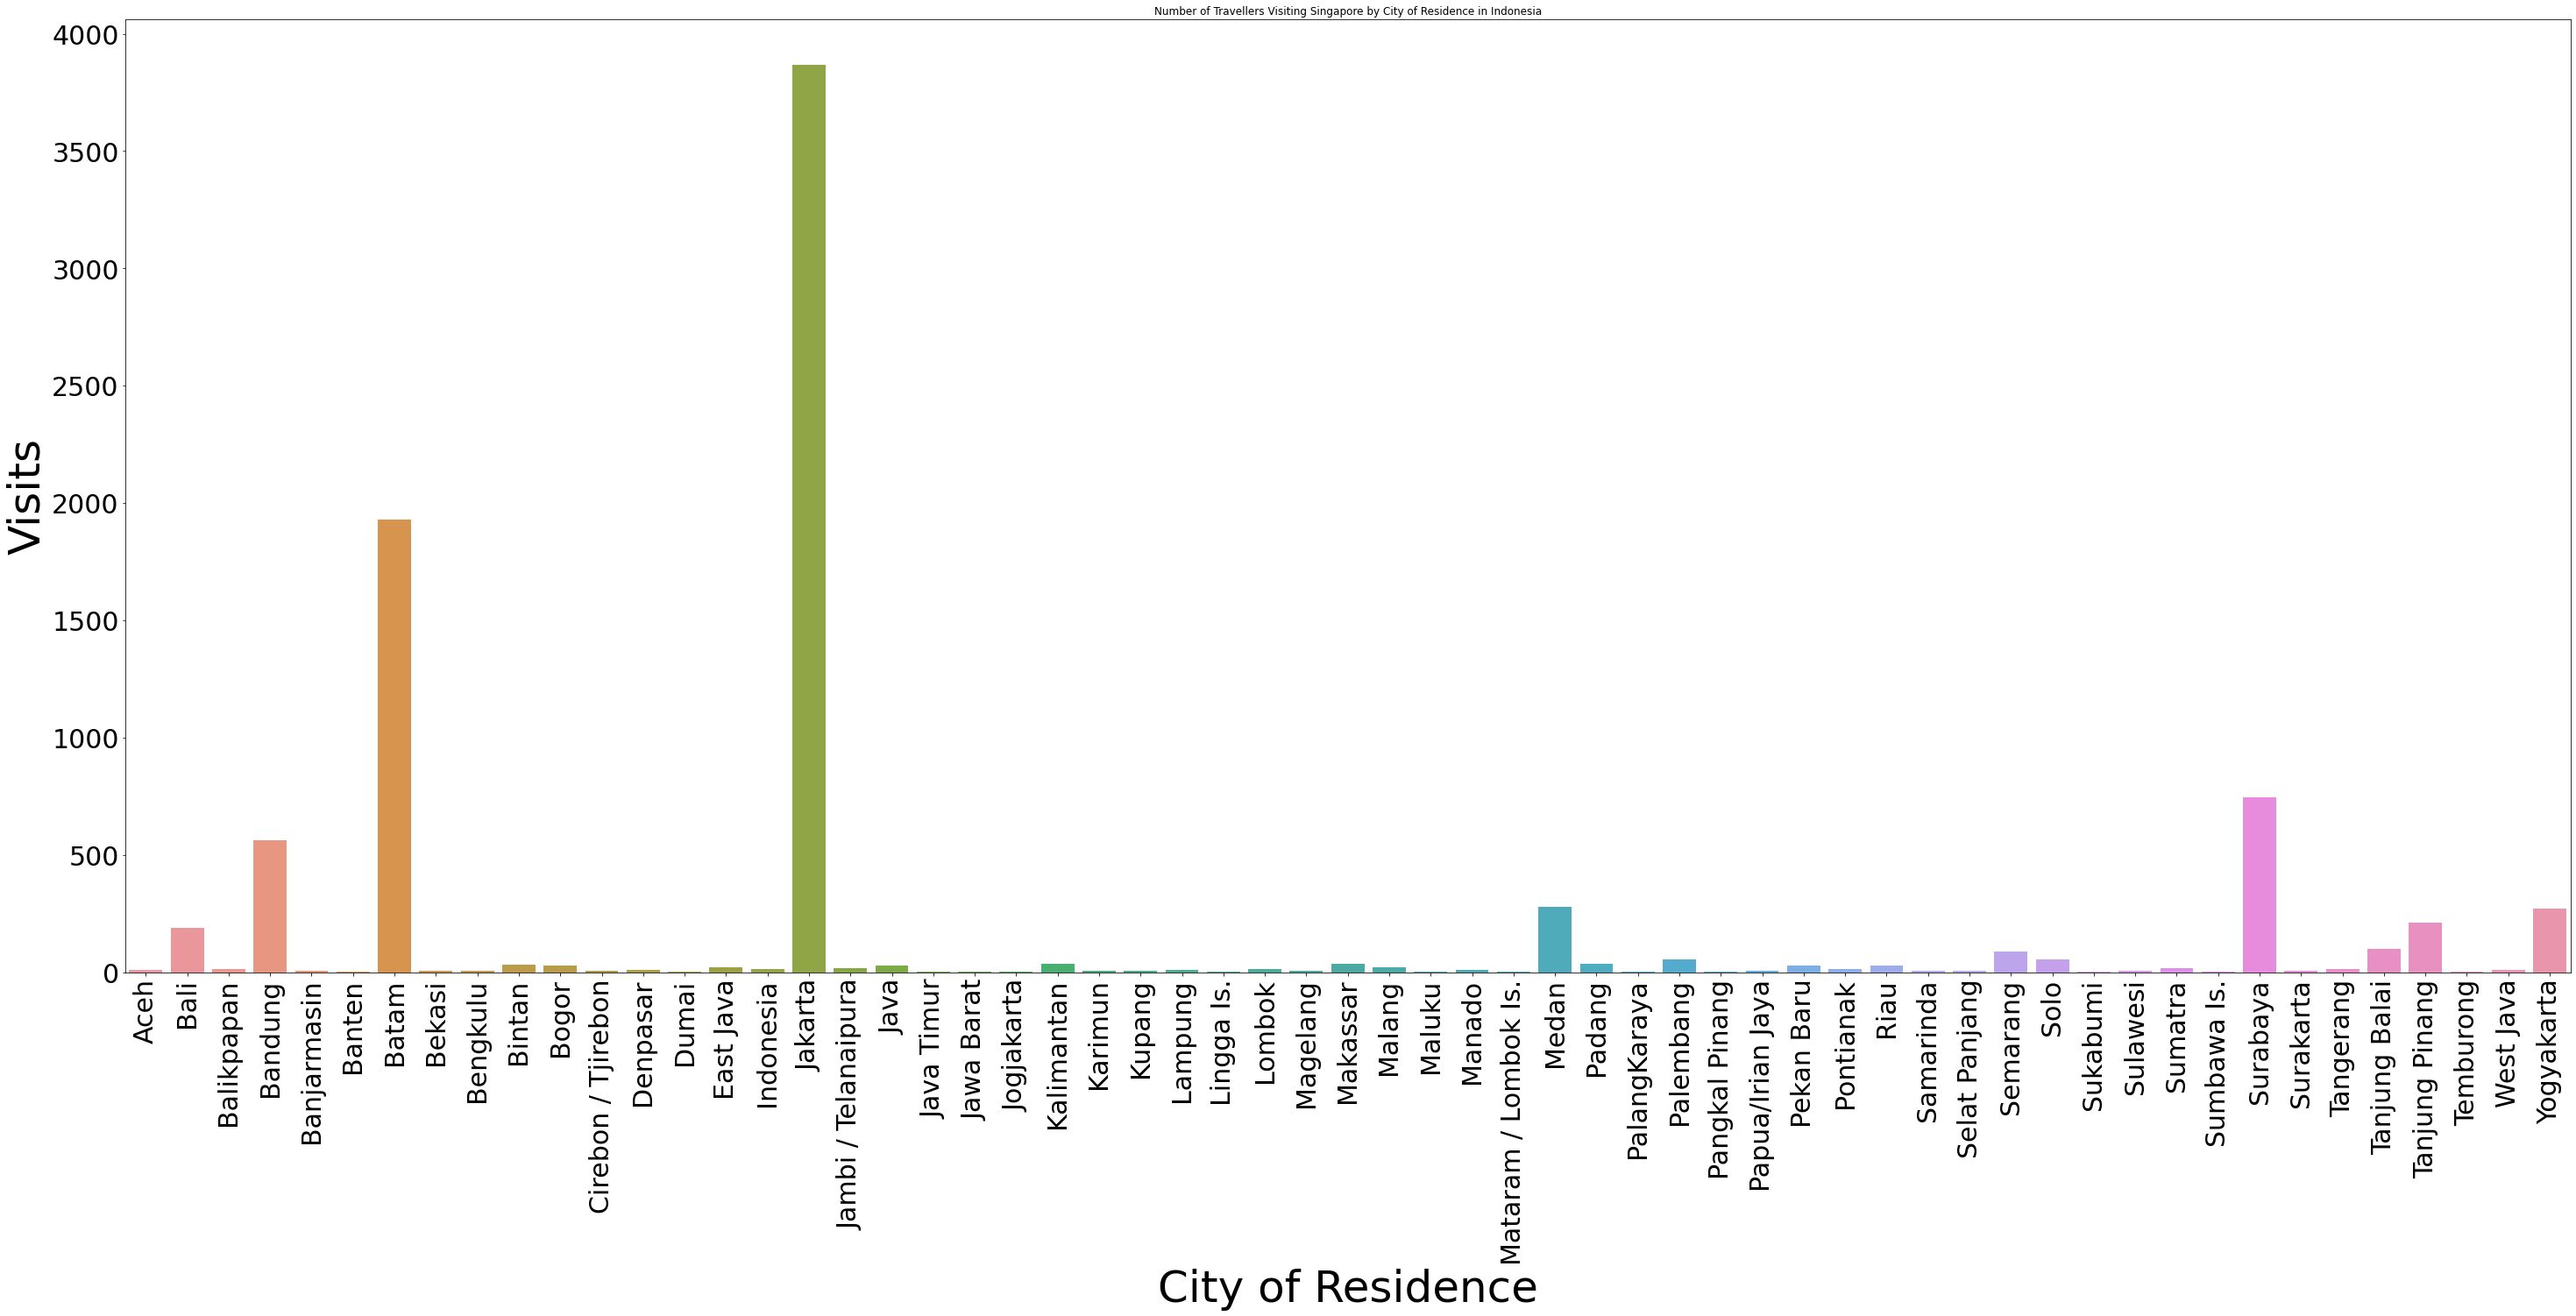

In [17]:
grouped_data = df2.groupby("City_residence").size().reset_index(name="Visits")
plt.figure(figsize=(50,20))
sns.barplot(x="City_residence", y="Visits", data=grouped_data)
plt.xticks(rotation=90)
plt.xlabel("City of Residence")
plt.ylabel("Visits")
plt.title("Number of Travellers Visiting Singapore by City of Residence in Indonesia")
plt.gca().xaxis.label.set_size(50)
plt.gca().yaxis.label.set_size(50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

This information could be useful for various stakeholders, including business men, researchers, and travelers, in different ways:

1. Business Men: Knowing which cities have the highest number of travelers visiting Singapore can help businesses target their marketing efforts to attract more tourists from those cities. They could also use this information to make informed decisions about opening new branches in those cities or expanding their existing ones.
2. Researchers: This information can provide insights into travel patterns and preferences of Indonesian travelers, which could be useful in studying the travel industry and making recommendations for future policy changes.
3. Travelers: Travelers visiting Singapore could benefit from this information by making informed decisions about their travel plans. For example, they may choose to stay in areas near Jakarta or Batam to take advantage of the higher concentration of Indonesian travelers, or avoid areas near Bali if they are looking for a more unique travel experience.

As we have seen despite Bali being the most popular places for beaches and charming vacations it has one of the less visitors from indonesia. This should incourage Govt and business men to start investing again into Bali and it has also reported water scarcity. Viewing the visitors response, stake holders should start investing in Bali and keep the good work in jakarta and balam.

More visitors in Jakarta and batam might flourish the local business's and markets in these cities so Govt should start providing incentives in these cities. There are more than 4000 visitors in in just few months in these cities so travel agencies could take this as a sign to a new dream destination

### Q3: What is the relationship between the purpose of travel and the length of stay for Indonesian travellers?

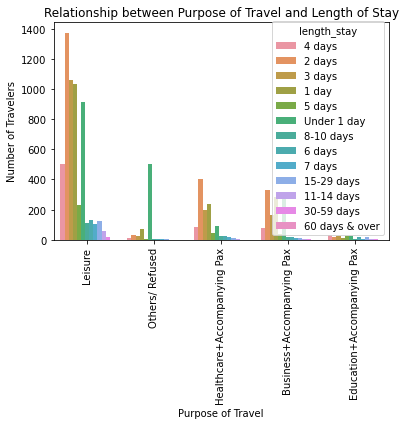

<Figure size 3600x1440 with 0 Axes>

In [18]:
sns.countplot(x="Purpose_grp", hue="length_stay", data=df2)
plt.xticks(rotation=90)
plt.xlabel("Purpose of Travel")
plt.ylabel("Number of Travelers")
plt.title("Relationship between Purpose of Travel and Length of Stay")
plt.figure(figsize=(50,20))
plt.show()

As we can see from the count plot that most of the visitors were in singapore for vacations and enjoy there time in the country in the city of jakarta and batam as we see previously. This could help the investors to build more tourist attractions and travel destinations within the city. As most of the visitors visited for many short period of time (almost 2 days) this means that city must have best transport system for tourist to visit maximum tourism sites and based on this local businesses can promote and advertise themselves in the targeted cities such as jakarta and batam.

### Q4: What is the relationship between the type of travel and the amount spent by Indonesian travellers on transport?

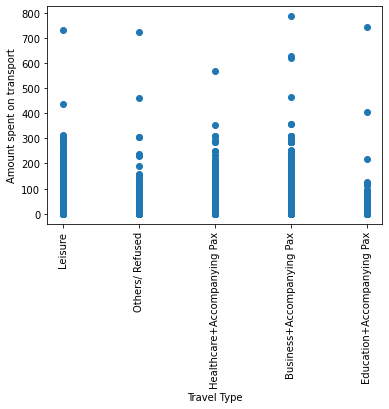

In [19]:
# Plot a scatter plot
plt.scatter(df2["Purpose_grp"], df["tottran_$"])
plt.xticks(rotation=90)
# Add labels
plt.xlabel("Travel Type")
plt.ylabel("Amount spent on transport")

# Show the plot
plt.show()

In [20]:
df2.groupby('Purpose_grp')['tottran_$'].mean()

Purpose_grp
Business+Accompanying Pax      57.855667
Education+Accompanying Pax     32.448457
Healthcare+Accompanying Pax    42.495512
Leisure                        29.692849
Others/ Refused                26.641462
Name: tottran_$, dtype: float64

From the scatter plot it is clearly depicted that most of the people traveled for leisure and many others also traveled for business purposes to Singapore. There are plenty of businessmen who visited and they cannot be ignored. Looks like they spent most of transport probably for their business presentations. This insight could help Singapore local transport owners to introduce more cost-effective transport options for business men.

### Q5: What class of indonesians mostly visit Singapore?

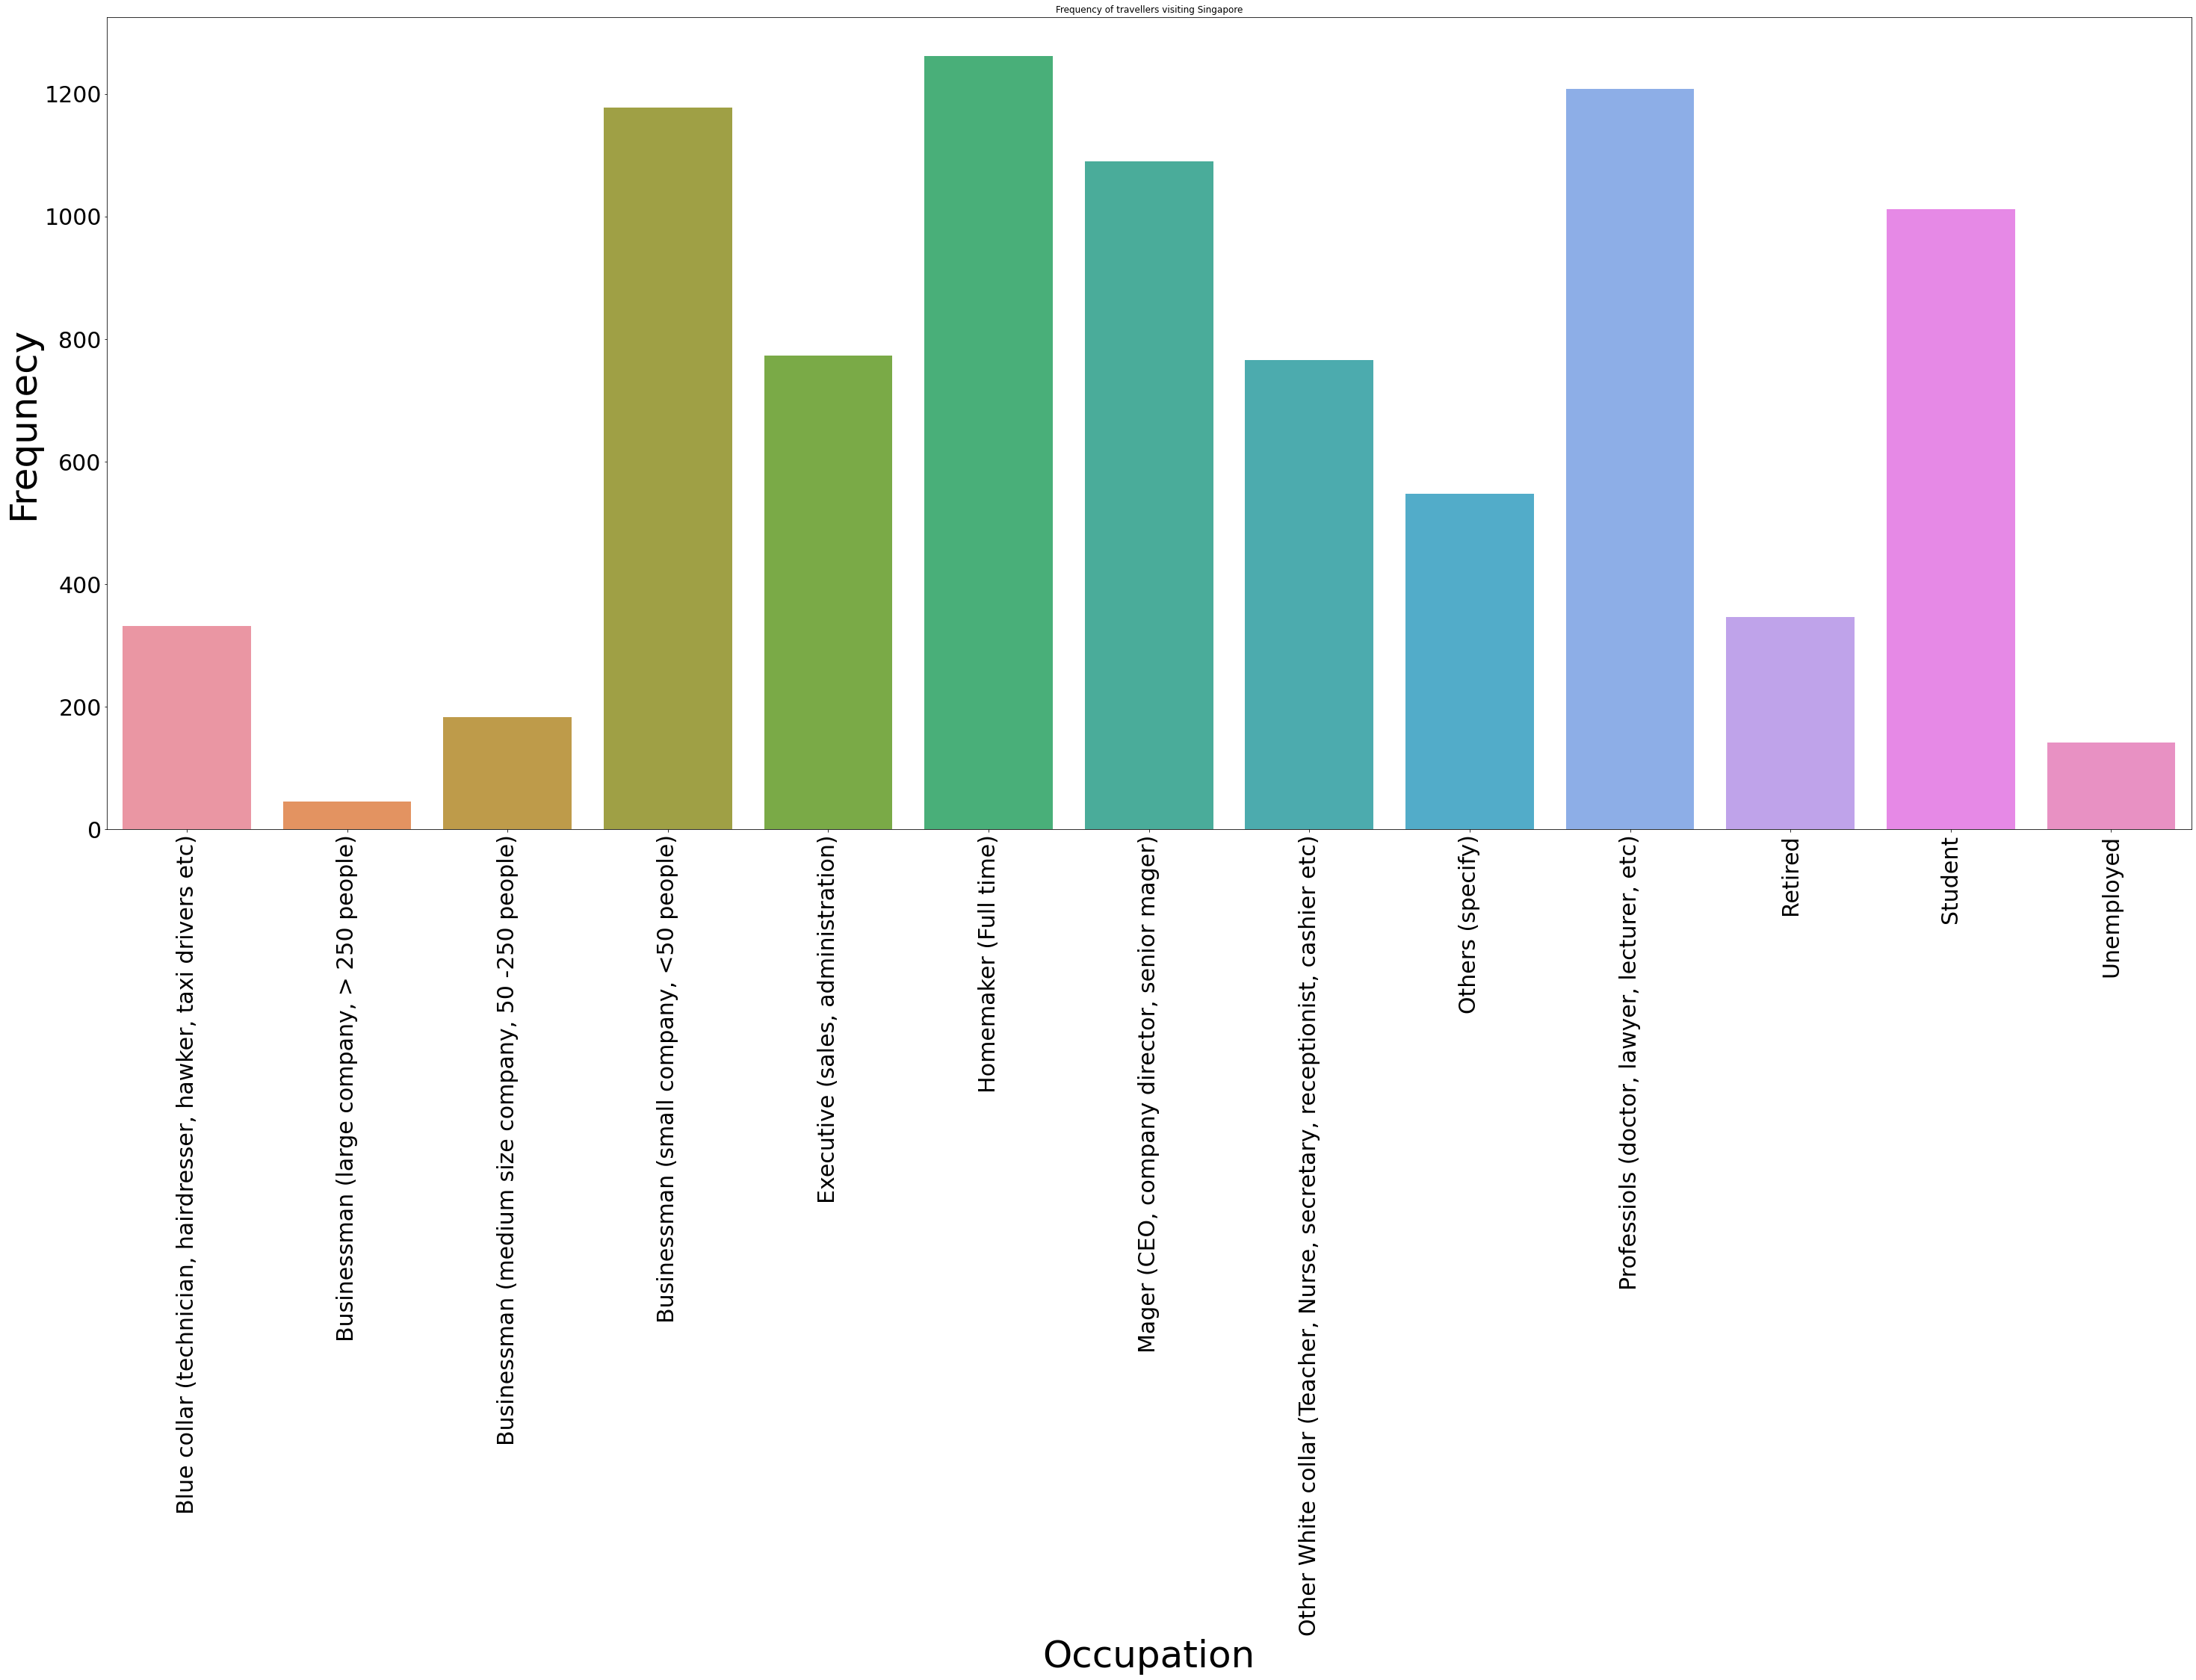

In [21]:
grouped_data = df2.groupby("f3_occupation").size().reset_index(name="Frequency")
plt.figure(figsize=(50,20))
sns.barplot(x="f3_occupation", y="Frequency", data=grouped_data)
plt.xticks(rotation=90)
plt.xlabel("Occupation")
plt.ylabel("Frequnecy")
plt.title("Frequency of travellers visiting Singapore")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.gca().xaxis.label.set_size(50)
plt.gca().yaxis.label.set_size(50)
plt.show()

This Bar plot shows that the maximum number of visitors who visited the Singapore in 2014 to 2015 belonged to business men related to construction works and then the prefessionals (Doctors, Engineers, cashiers etc.) were the second highest in visiting Batam and Jakarta cities of Singapore. This means that local business men in these cities specially related to construction work could advertise their capabilities to business men from Indonesia and as most of the visitors visiting singapore were from class of working professionals. So, this could be a golden opportunity for providing them with incentives and better working environemnt so that they could come to singapore not just for holidays but for work also to add up to their economy and society as a whole.

### Q6: Which age group of Indonesian travellers spends the most on food and beverages?

In [22]:
df3 = df2[df2['totfnb_$'].str.len() != 8]

C:\Users\USMANJ~1\AppData\Local\Temp/ipykernel_6340/816575244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['totfnb_$'] = df3['totfnb_$'].astype(float)


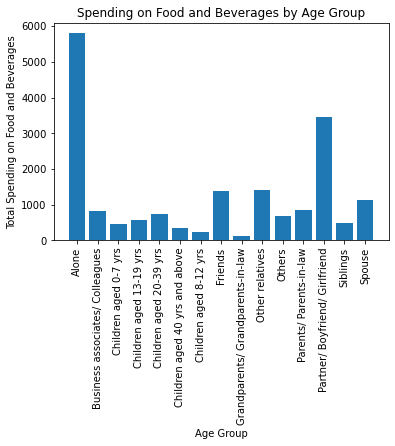

In [23]:
df3['totfnb_$'] = df3['totfnb_$'].astype(float)

# Group the data by age_group and calculate the total spending by each group
grouped_df = df3.groupby('travel_companion.1')['totfnb_$'].max().reset_index()

# Create a bar plot
plt.bar(grouped_df['travel_companion.1'], grouped_df['totfnb_$'])
plt.xticks(rotation=90)
plt.xlabel('Age Group')
plt.ylabel('Total Spending on Food and Beverages')
plt.title('Spending on Food and Beverages by Age Group')
plt.show()

Food & Beverage industry of Jakarta and Batam is estimated to be 92.8 Billion dollar annually. Our data shows that studs despite being less in numbers if consider their visit to Singapore spent the most money Food and Beverages. Now the local business men and traders can imrpovise their marketing strategies according to that and secondly persons who traveled with their girlfriends may be on date or on vacations spent the most. This shows the potential to grow their businesses in Singapore market by making their policies right by targetting specefic audience according to our insight.

### Q7: What is the relationship between the occupation of Indonesian travellers and the amount spent on business activities?

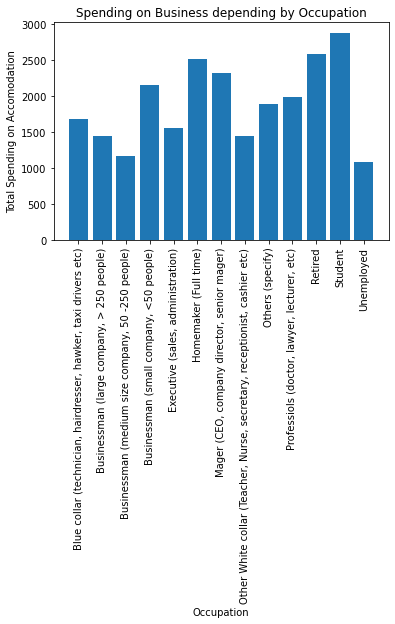

In [67]:
df3 = df2[df2['totacc_$'].str.len() != 8]
df3['totacc_$'] = df3['totacc_$'].astype(float)

# Group the data by age_group and calculate the total spending by each group
grouped_df = df3.groupby('f3_occupation')['totacc_$'].max().reset_index()

# Create a bar plot
plt.bar(grouped_df['f3_occupation'], grouped_df['totacc_$'])
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Total Spending on Accomodation')
plt.title('Spending on Business depending by Occupation')
plt.show()

As we seen earlier construction related businessmen were the maximum who travelled as visitors to Singapore in 2014 to 2015 this insight shows that they spent most on travelling and accomodation also. It is not quite encouraging. Cost effective incentives by the local residential sociaties and hotels could be encouraging for business men to travel in a loop to Singapore secondly it seems that accomodation is also quite expensive for students which is kind of pretty much bad delineation. Universities and hostels in Singapore should come hand in hand for cost effective and economical accomodation for students. This might increase the students as visitors to Singapore because right now their frequency is less as compared to other visitors this means that students are not considering Singapore as education friendly country.

### Q8: How many visitors visited Singapore have their 1st visit based upon their designation? 

In [25]:
grouped_df = df3.groupby("f5_designation")['1st_visit'].mean().reset_index()

# display the result
print(grouped_df)

                        f5_designation  1st_visit
0                   Board of Directors   0.166667
1                   CEO/ Assistant CEO   0.032258
2                             Chairman   0.052632
3   Clerk/ Secretary/ Persol Assistant   0.340741
4           Deputy/ Assistant Director   0.083333
5                             Director   0.053299
6                        General Mager   0.107692
7                     Junior Executive   0.233728
8               Mager/ Assistant Mager   0.073897
9                     Others (specify)   0.140006
10           President/ Vice-President   0.117647
11                    Senior Executive   0.164384


This result provides insights into the average time between a customer's first and second visit for each job designation. This information can be useful for businesses in multiple ways. For example, they can use this data to:

Identify customer segments that are more likely to become repeat customers and target them with tailored marketing strategies.

Determine which job designations tend to have a longer time between visits and try to understand why this is the case. They could then develop strategies to shorten this interval and increase customer loyalty.

Evaluate the effectiveness of their current customer retention strategies and make adjustments based on the data.

For researchers, this information can provide valuable insights into consumer behavior and purchasing patterns. They can use this data to make conclusions about the relationship between job designations and customer loyalty, and to inform future research in this area.

### Q9: What is the relationship between the type of accommodation preferred by Indonesian travellers and the amount spent on accommodation?

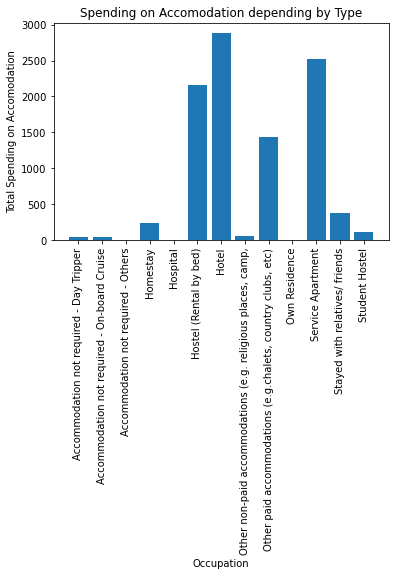

In [66]:
grouped_df = df3.groupby('MainAccomm')['totacc_$'].max().reset_index()

# Create a bar plot
plt.bar(grouped_df['MainAccomm'], grouped_df['totacc_$'])
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Total Spending on Accomodation')
plt.title('Spending on Accomodation depending by Type')
plt.show()

Like we saw previously that Singapore is proved to be very expensive for students and business men specially and most of them are opting for hotels in Jakarta and Batam. This means that this insight could be a chance for hotel owners in these cities to revise their rates per night and offer monthly incentives and cost effective rooms to visitors so that they can ecourage more visits of students and business men as they are the most spending on accomodation.

### Q10: What is the relationship between the companion of Indonesian travellers and the amount spent on shopping?

C:\Users\USMANJ~1\AppData\Local\Temp/ipykernel_6340/3630544825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['totshopping_$'] = df3['totshopping_$'].astype(float)


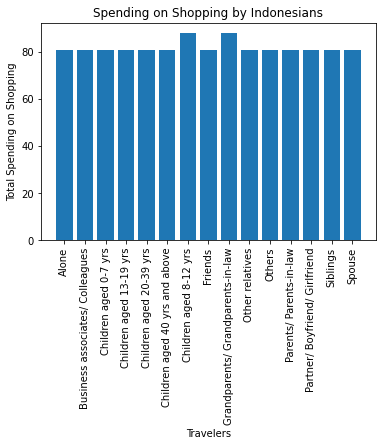

In [27]:
df3 = df2[df2['totshopping_$'].str.len() != 8]
df3['totshopping_$'] = df3['totshopping_$'].astype(float)

# Group the data by age_group and calculate the total spending by each group
grouped_df = df3.groupby('travel_companion.1')['totshopping_$'].min().reset_index()

# Create a bar plot
plt.bar(grouped_df['travel_companion.1'], grouped_df['totshopping_$'])
plt.xticks(rotation=90)
plt.xlabel('Travelers')
plt.ylabel('Total Spending on Shopping')
plt.title('Spending on Shopping by Indonesians')
plt.show()

This graph suggests that indonesians specially children and grandparents spent the least on shopping so they should not be the targeted market for advertisement. As most of the Gen-Z is on social media so shopping brands in Singapore can advertise more on social media and focus on Gen-Z fashion to provide best shopping facilities to travelers and in order to flourish their businesses

# DashBoard

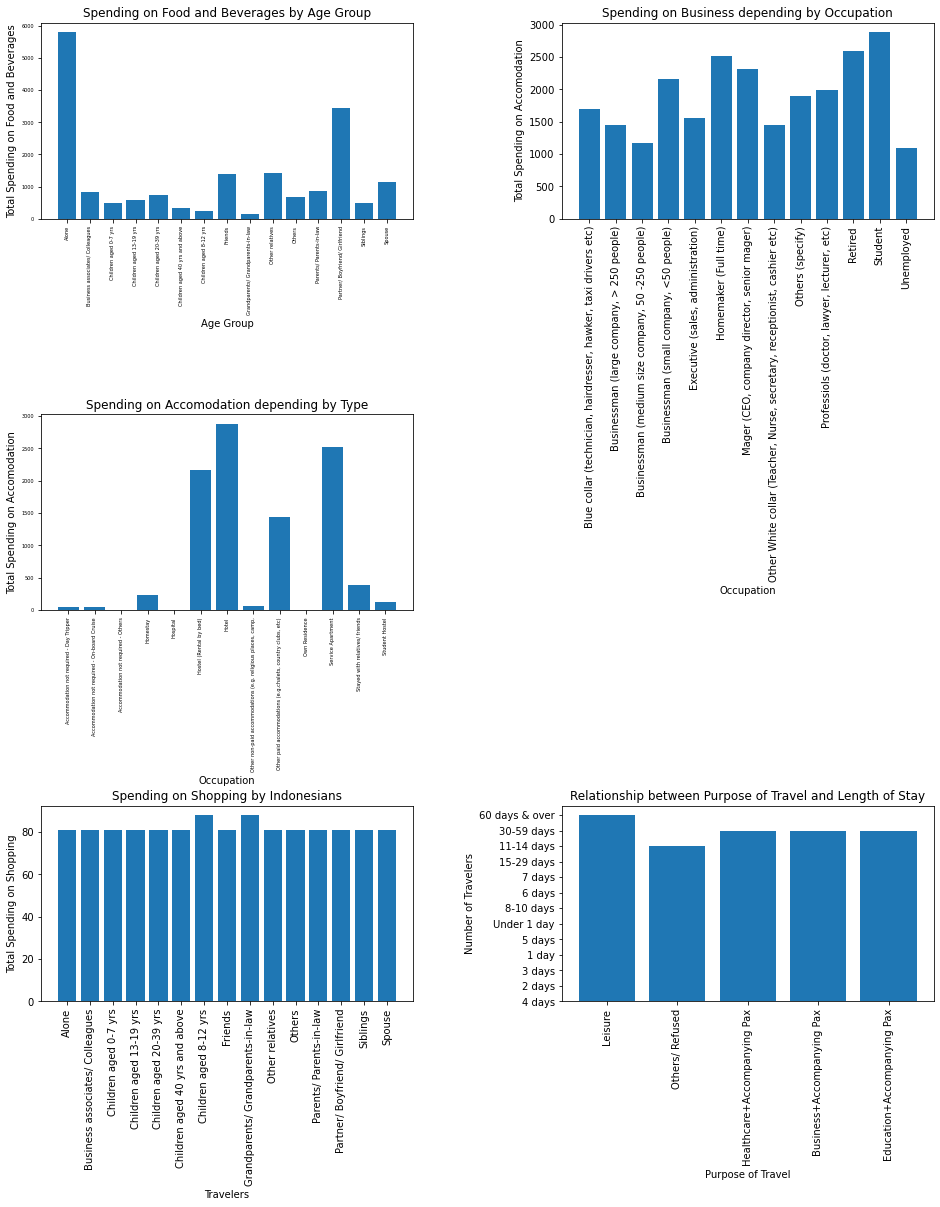

<Figure size 3600x1440 with 0 Axes>

In [82]:
import matplotlib.gridspec as g
gs = g.GridSpec(3, 2, wspace=0.4, hspace=1)
fig = plt.figure(figsize=(16,18))
ax1 = fig.add_subplot(gs[0, 0])
df3 = df2[df2['totfnb_$'].str.len() != 8]
df3['totfnb_$'] = df3['totfnb_$'].astype(float)
# Group the data by age_group and calculate the total spending by each group
grouped_df = df3.groupby('travel_companion.1')['totfnb_$'].max().reset_index()
# Create a bar plot
ax1.bar(grouped_df['travel_companion.1'], grouped_df['totfnb_$'])
plt.xticks(rotation=90)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Age Group')
plt.ylabel('Total Spending on Food and Beverages')
plt.title('Spending on Food and Beverages by Age Group')
#plt.show()

ax2 = fig.add_subplot(gs[0, 1])
df3 = df2[df2['totacc_$'].str.len() != 8]
df3['totacc_$'] = df3['totacc_$'].astype(float)
# Group the data by age_group and calculate the total spending by each group
grouped_df = df3.groupby('f3_occupation')['totacc_$'].max().reset_index()
# Create a bar plot
ax2.bar(grouped_df['f3_occupation'], grouped_df['totacc_$'])
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Total Spending on Accomodation')
plt.title('Spending on Business depending by Occupation')
#plt.show()

ax3 = fig.add_subplot(gs[1, 0])
grouped_df = df3.groupby('MainAccomm')['totacc_$'].max().reset_index()
# Create a bar plot
#temp = ['Blue Collar', 'Businessmen','MBusinessmen', 'SBusinessmen', 'Executive', 'Homemaker', 'Magar', 'White Colar', 'Others', 'Professionals', 'Retired', 'Student', 'Unemployed']
ax3.bar(grouped_df['MainAccomm'], grouped_df['totacc_$'])
plt.xticks(rotation=90)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Occupation')
plt.ylabel('Total Spending on Accomodation')
plt.title('Spending on Accomodation depending by Type')
#plt.show()

ax4 = fig.add_subplot(gs[2, 0])
df3 = df2[df2['totshopping_$'].str.len() != 8]
df3['totshopping_$'] = df3['totshopping_$'].astype(float)
# Group the data by age_group and calculate the total spending by each group
grouped_df = df3.groupby('travel_companion.1')['totshopping_$'].min().reset_index()
# Create a bar plot
ax4.bar(grouped_df['travel_companion.1'], grouped_df['totshopping_$'])
plt.xticks(rotation=90)
plt.xlabel('Travelers')
plt.ylabel('Total Spending on Shopping')
plt.title('Spending on Shopping by Indonesians')

ax5 = fig.add_subplot(gs[2, 1])
ax5.bar(df2['Purpose_grp'], df2['length_stay'])
#ax5.countplot(x="Purpose_grp", hue="length_stay", data=df2)
plt.xticks(rotation=90)
plt.xlabel("Purpose of Travel")
plt.ylabel("Number of Travelers")
plt.title("Relationship between Purpose of Travel and Length of Stay")
plt.figure(figsize=(50,20))
plt.show()

plt.show()

# Future Add-ons

To get more insights in the future, I can follow these steps:

1. Collect more data: Collect data from various sources to get a more comprehensive understanding of the issue.
2. Data preprocessing: Clean and process the data to remove any irrelevant or missing information.
3. Exploratory Data Analysis (EDA): Use various data visualization techniques like histograms, scatter plots, etc. to understand the patterns and relationships in the data.
4. Feature Engineering: Create new features that capture the relevant information from the data.
6. Model Building: Build machine learning models to make predictions or uncover hidden patterns in the data.
7. Model Evaluation: Evaluate the performance of the models and compare the results to select the best model.
8. Communicating Results: Communicate the results in an effective manner to stakeholders by using data visualizations, reports, and presentations.
9. Continuously Refine: Continuously refine the analysis by incorporating new data, adjusting the models, and updating the insights.